# Explore here

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# modelado
from sklearn.linear_model import LogisticRegression

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

archivo= "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"

df_original = pd.read_csv(archivo, sep=";")
df = pd.read_csv(archivo, sep=";")


datos,atributos=df.shape
print(f"Contamos con {datos} cantidad de datos y {atributos} atributos.")
print()

# Valores duplicados

duplicados = df.duplicated()
num_duplicados = duplicados.sum()

print(f"Contamos con {num_duplicados} datos duplicados")
print()

df_duplicados = df[duplicados]

df_sin_duplicados = df.drop_duplicates()

df=df_sin_duplicados

# Obtener información sobre tipos de datos y valores no nulos
df.info()




Contamos con 41188 cantidad de datos y 21 atributos.

Contamos con 12 datos duplicados

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float6

- Contamos con 41.188 datos de clientes y 21 atributos.
- 12 datos de clientes están duplicados. Al eliminarlos resulta un total de 41.176.
- Ninguno de los atributos posee valores nulos.
- 10 características son numéricas y 11 características son categóricas. En esta última se encuentra nuestra variable a predecir.

### Selección de atributos relevantes:

Los siguientes atributos no aportan información a nuestra variable a predecir:
- contact
- month
- day_of_week
- duration

In [2]:
df.drop(["contact", "month", "day_of_week","duration"], axis = 1, inplace = True)

df.head()

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Análisis univariante

Variables Categóricas: 
- job: Tipo de trabajo
- marital: Estado civil
- education: Nivel de educación 
- default: ¿Tiene crédito actualmente? 
- housing: ¿Tiene un préstamo de vivienda? 
- loan: ¿Tiene un préstamo personal? 
- previous: Número de contactos realizados durante la campaña anterior al cliente
- poutcome: Resultado de la campaña de marketing anterior
- y: El cliente contrata un depósito a largo plazo o no (Variable objetivo).

In [3]:
df.job.value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [4]:
df.marital.value_counts()

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

In [5]:
df.education.value_counts()

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

In [6]:
df.default.value_counts()

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

In [7]:
df.housing.value_counts()

housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64

In [8]:
df.loan.value_counts()

loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64

In [9]:
df.poutcome.value_counts()

poutcome
nonexistent    35551
failure         4252
success         1373
Name: count, dtype: int64

In [10]:
df.y.value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

In [11]:
df.head()

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


/tmp/ipykernel_662/81394305.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45, ha="right", fontsize=10)
/tmp/ipykernel_662/81394305.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[2, 0].set_xticklabels(axis[2, 0].get_xticklabels(), rotation=45, ha="right", fontsize=10)


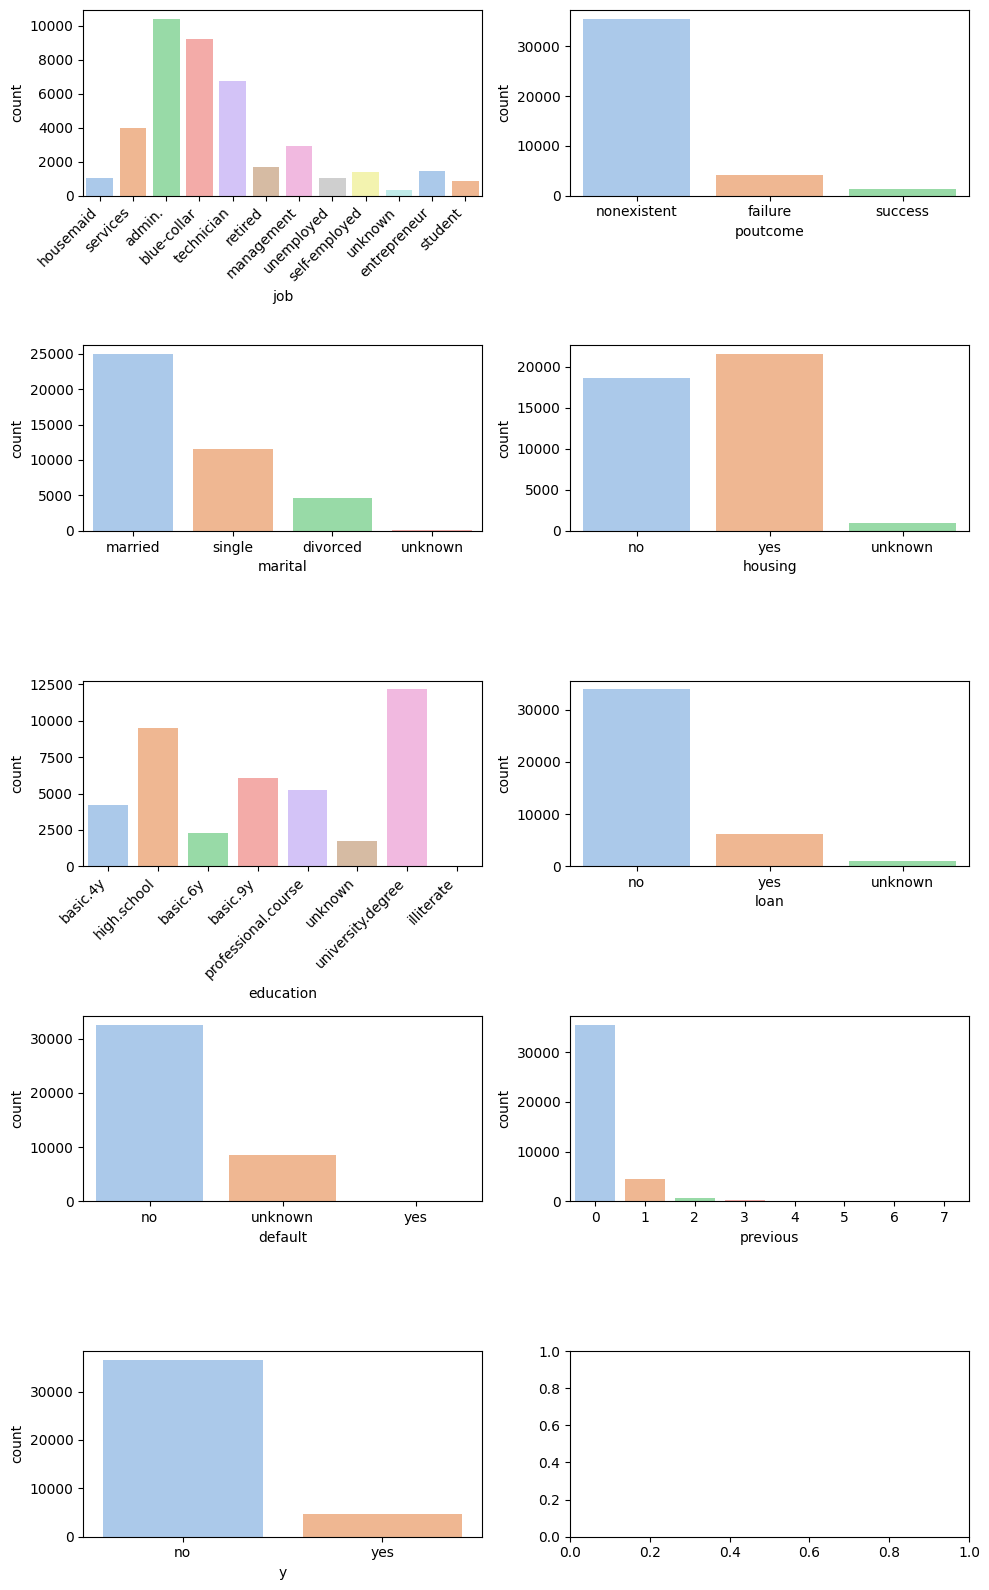

In [12]:
fig, axis = plt.subplots(5, 2, figsize = (10, 16))

sns.countplot(ax = axis[0,0], data = df, x = "job", palette='pastel', hue= "job", legend=False)
axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45, ha="right", fontsize=10)
sns.countplot(ax = axis[1,0], data = df, x = "marital", palette='pastel', hue= "marital", legend=False)
sns.countplot(ax = axis[2,0], data = df, x = "education", palette='pastel', hue= "education", legend=False)
axis[2, 0].set_xticklabels(axis[2, 0].get_xticklabels(), rotation=45, ha="right", fontsize=10)
sns.countplot(ax = axis[3,0], data = df, x = "default", palette='pastel', hue= "default", legend=False)
sns.countplot(ax = axis[0,1], data = df, x = "poutcome", palette='pastel', hue= "poutcome", legend=False)
sns.countplot(ax = axis[1,1], data = df, x = "housing", palette='pastel', hue= "housing", legend=False)
sns.countplot(ax = axis[2,1], data = df, x = "loan", palette='pastel', hue= "loan", legend=False)
sns.countplot(ax = axis[3,1], data = df, x = "previous", palette='pastel', hue= "previous", legend=False)
sns.countplot(ax = axis[4,0], data = df, x = "y", palette='pastel', hue= "y", legend=False)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- Los empleos de los clientes rondan mayoritariamente en administrativo, obrero y técnico.
- Podemos observar que la variable "poutcome" la mayoría de las variables son inexistentes. Vamos a eliminar este dato dado a que no aportará información en nuestra predicción.
- La mayoría de los clientes están casados.
- Es equilibrado los clientes que poseen préstamos de viviendas y los que no.
- Los clientes mayoritariamente tienen estudios universitarios, secundarios y básicos.
- La mayoría de los clientes no poseen un crédito actualmente.
- La mayoría de los clientes no fueron contactados durante la campaña anterior.
- La mayoría de los clientes no contratará un depósito a largo plazo.


In [13]:
# Eliminamos la variable "poutcome":
df.drop(["poutcome"], axis = 1, inplace = True)

# En la variable educación reemplazamos 'basic.4y', 'basic.6y', 'basic.9y' por 'basic'
df['education'] = df['education'].replace({'basic.4y': 'basic', 'basic.6y': 'basic', 'basic.9y': 'basic'})
df.head()

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic,no,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


Variables numéricas: 
- age: Edad del cliente
- campaign: Número de contactos realizados durante esta campaña al cliente 
- pdays: Número de días que transcurrieron desde la última campaña hasta que fue contactado 
- emp.var.rate: Tasa de variación del empleo. Indicador trimestral
- cons.price.idx: Índice de precios al consumidor. Indicador mensual
- cons.conf.idx: Índice de confianza del consumidor. Indicador mensual
- euribor3m: Tasa EURIBOR 3 meses. Indicador diario.
- nr.employed. Número de empleados. Indicador trimestral


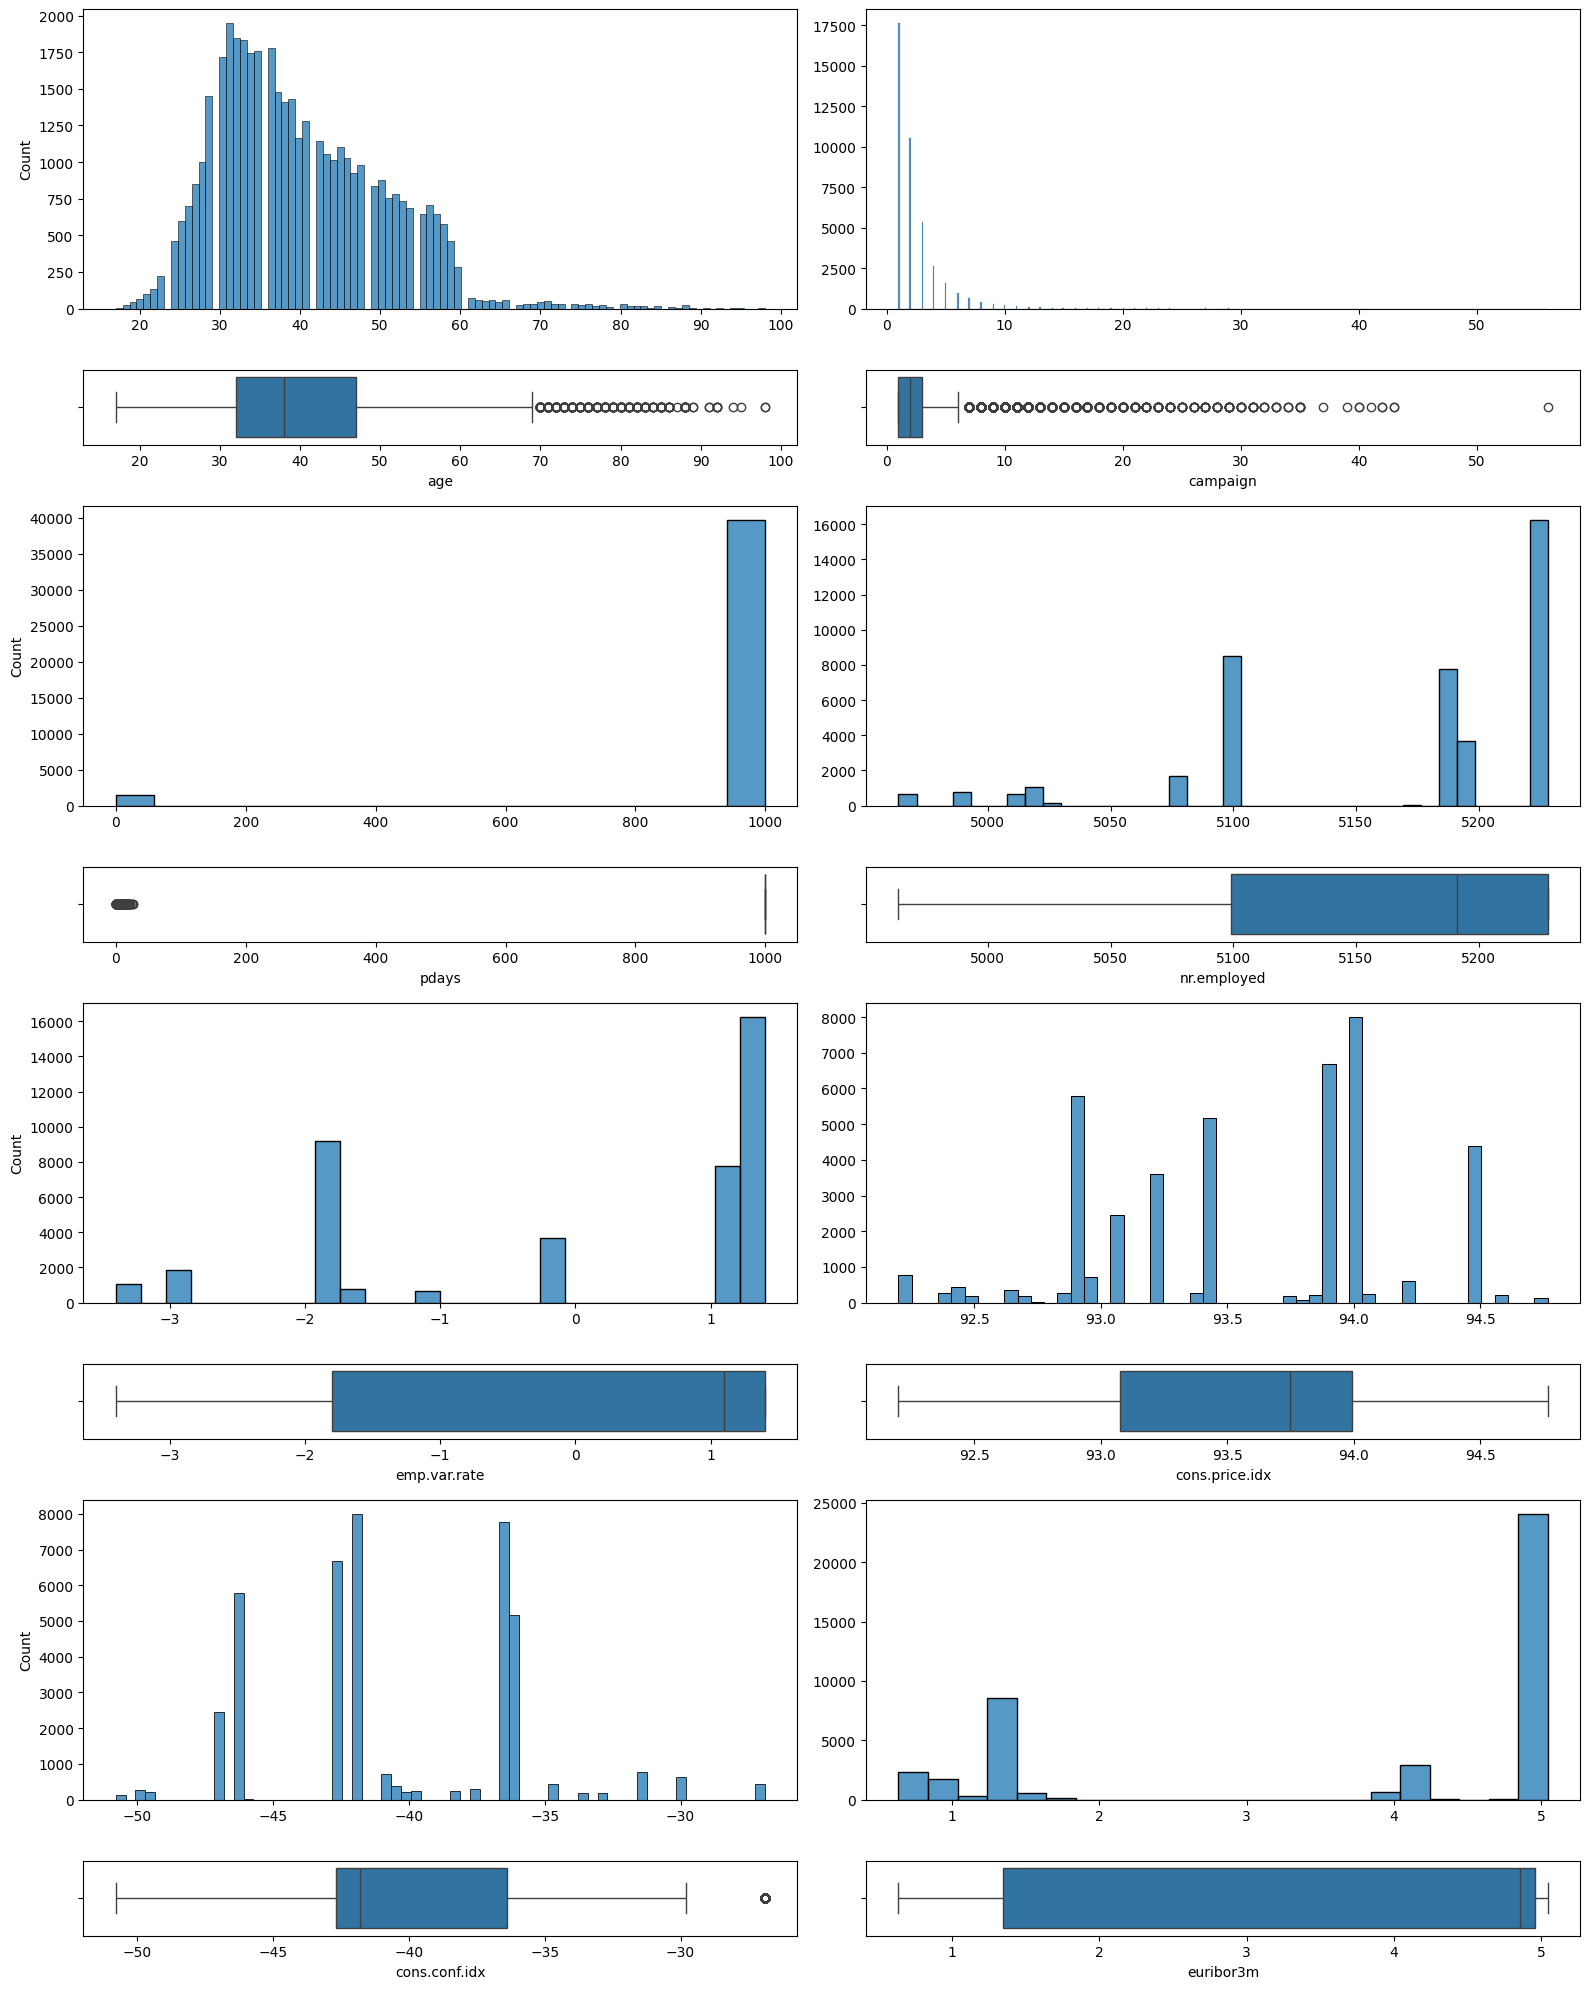

In [14]:
fig, axis = plt.subplots(8, 2, figsize = (16, 20), gridspec_kw={'height_ratios': [6, 1.5, 6, 1.5, 6, 1.5, 6, 1.5]})

			

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")

sns.histplot(ax = axis[0, 1], data = df, x = "campaign").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "campaign")

sns.histplot(ax = axis[2, 0], data = df, x = "pdays").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "pdays")

sns.histplot(ax = axis[2, 1], data = df, x = "nr.employed").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "nr.employed")

sns.histplot(ax = axis[4, 0], data = df, x = "emp.var.rate").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = df, x = "emp.var.rate")

sns.histplot(ax = axis[4, 1], data = df, x = "cons.price.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 1], data = df, x = "cons.price.idx")

sns.histplot(ax = axis[6, 0], data = df, x = "cons.conf.idx").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = df, x = "cons.conf.idx")

sns.histplot(ax = axis[6, 1], data = df, x = "euribor3m").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[7, 1], data = df, x = "euribor3m")



# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [15]:
df.pdays.value_counts()

pdays
999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

Podemos asumir que el dato de 999 días se asuma como dato nulo, ya que no tiene sentido por el contexto de la variable. Con tantos datos nulos eliminaremos la variable para el análisis ya que no aportará información para nuestro objetivo.

In [16]:
# Eliminamos la variable "pdays":
df.drop(["pdays"], axis = 1, inplace = True)

### Análisis multivariante

In [17]:
df.head()

,age,job,marital,education,default,housing,loan,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,no,1,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic,no,no,no,1,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,0,1.1,93.994,-36.4,4.857,5191.0,no


/tmp/ipykernel_662/3197001113.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45, ha="right", fontsize=10)
/tmp/ipykernel_662/3197001113.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 2].set_xticklabels(axis[0, 2].get_xticklabels(), rotation=45, ha="right", fontsize=10)


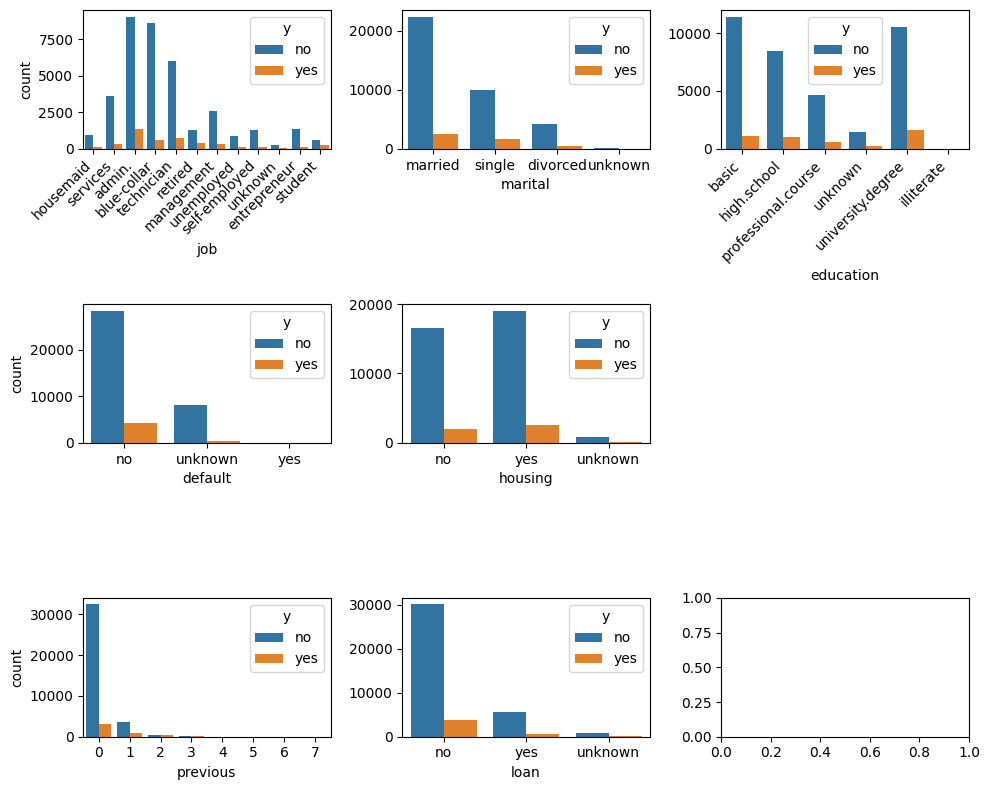

In [22]:
fig, axis = plt.subplots(3, 3, figsize = (10, 8))

sns.countplot(ax = axis[0, 0], data = df, x = "job", hue = "y")
axis[0, 0].set_xticklabels(axis[0, 0].get_xticklabels(), rotation=45, ha="right", fontsize=10)
sns.countplot(ax = axis[0, 1], data = df, x = "marital", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = df, x = "education", hue = "y").set(ylabel = None)
axis[0, 2].set_xticklabels(axis[0, 2].get_xticklabels(), rotation=45, ha="right", fontsize=10)
sns.countplot(ax = axis[1, 0], data = df, x = "default", hue = "y")
sns.countplot(ax = axis[1, 1], data = df, x = "housing", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 1], data = df, x = "loan", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 0], data = df, x = "previous", hue = "y")


plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()

No se distingue una característica puntual entre los clienten que contratarán un depósito a largo plazo y los que no.

In [26]:
df.head()

,age,job,marital,education,default,housing,loan,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,no,1,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic,no,no,no,1,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,0,1.1,93.994,-36.4,4.857,5191.0,no


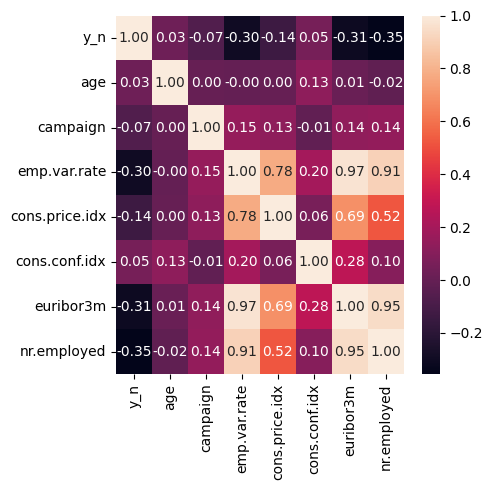

In [27]:
df["y_n"] = pd.factorize(df["y"])[0]

fig, axis = plt.subplots(figsize = (5, 5))

sns.heatmap(df[["y_n", "age", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

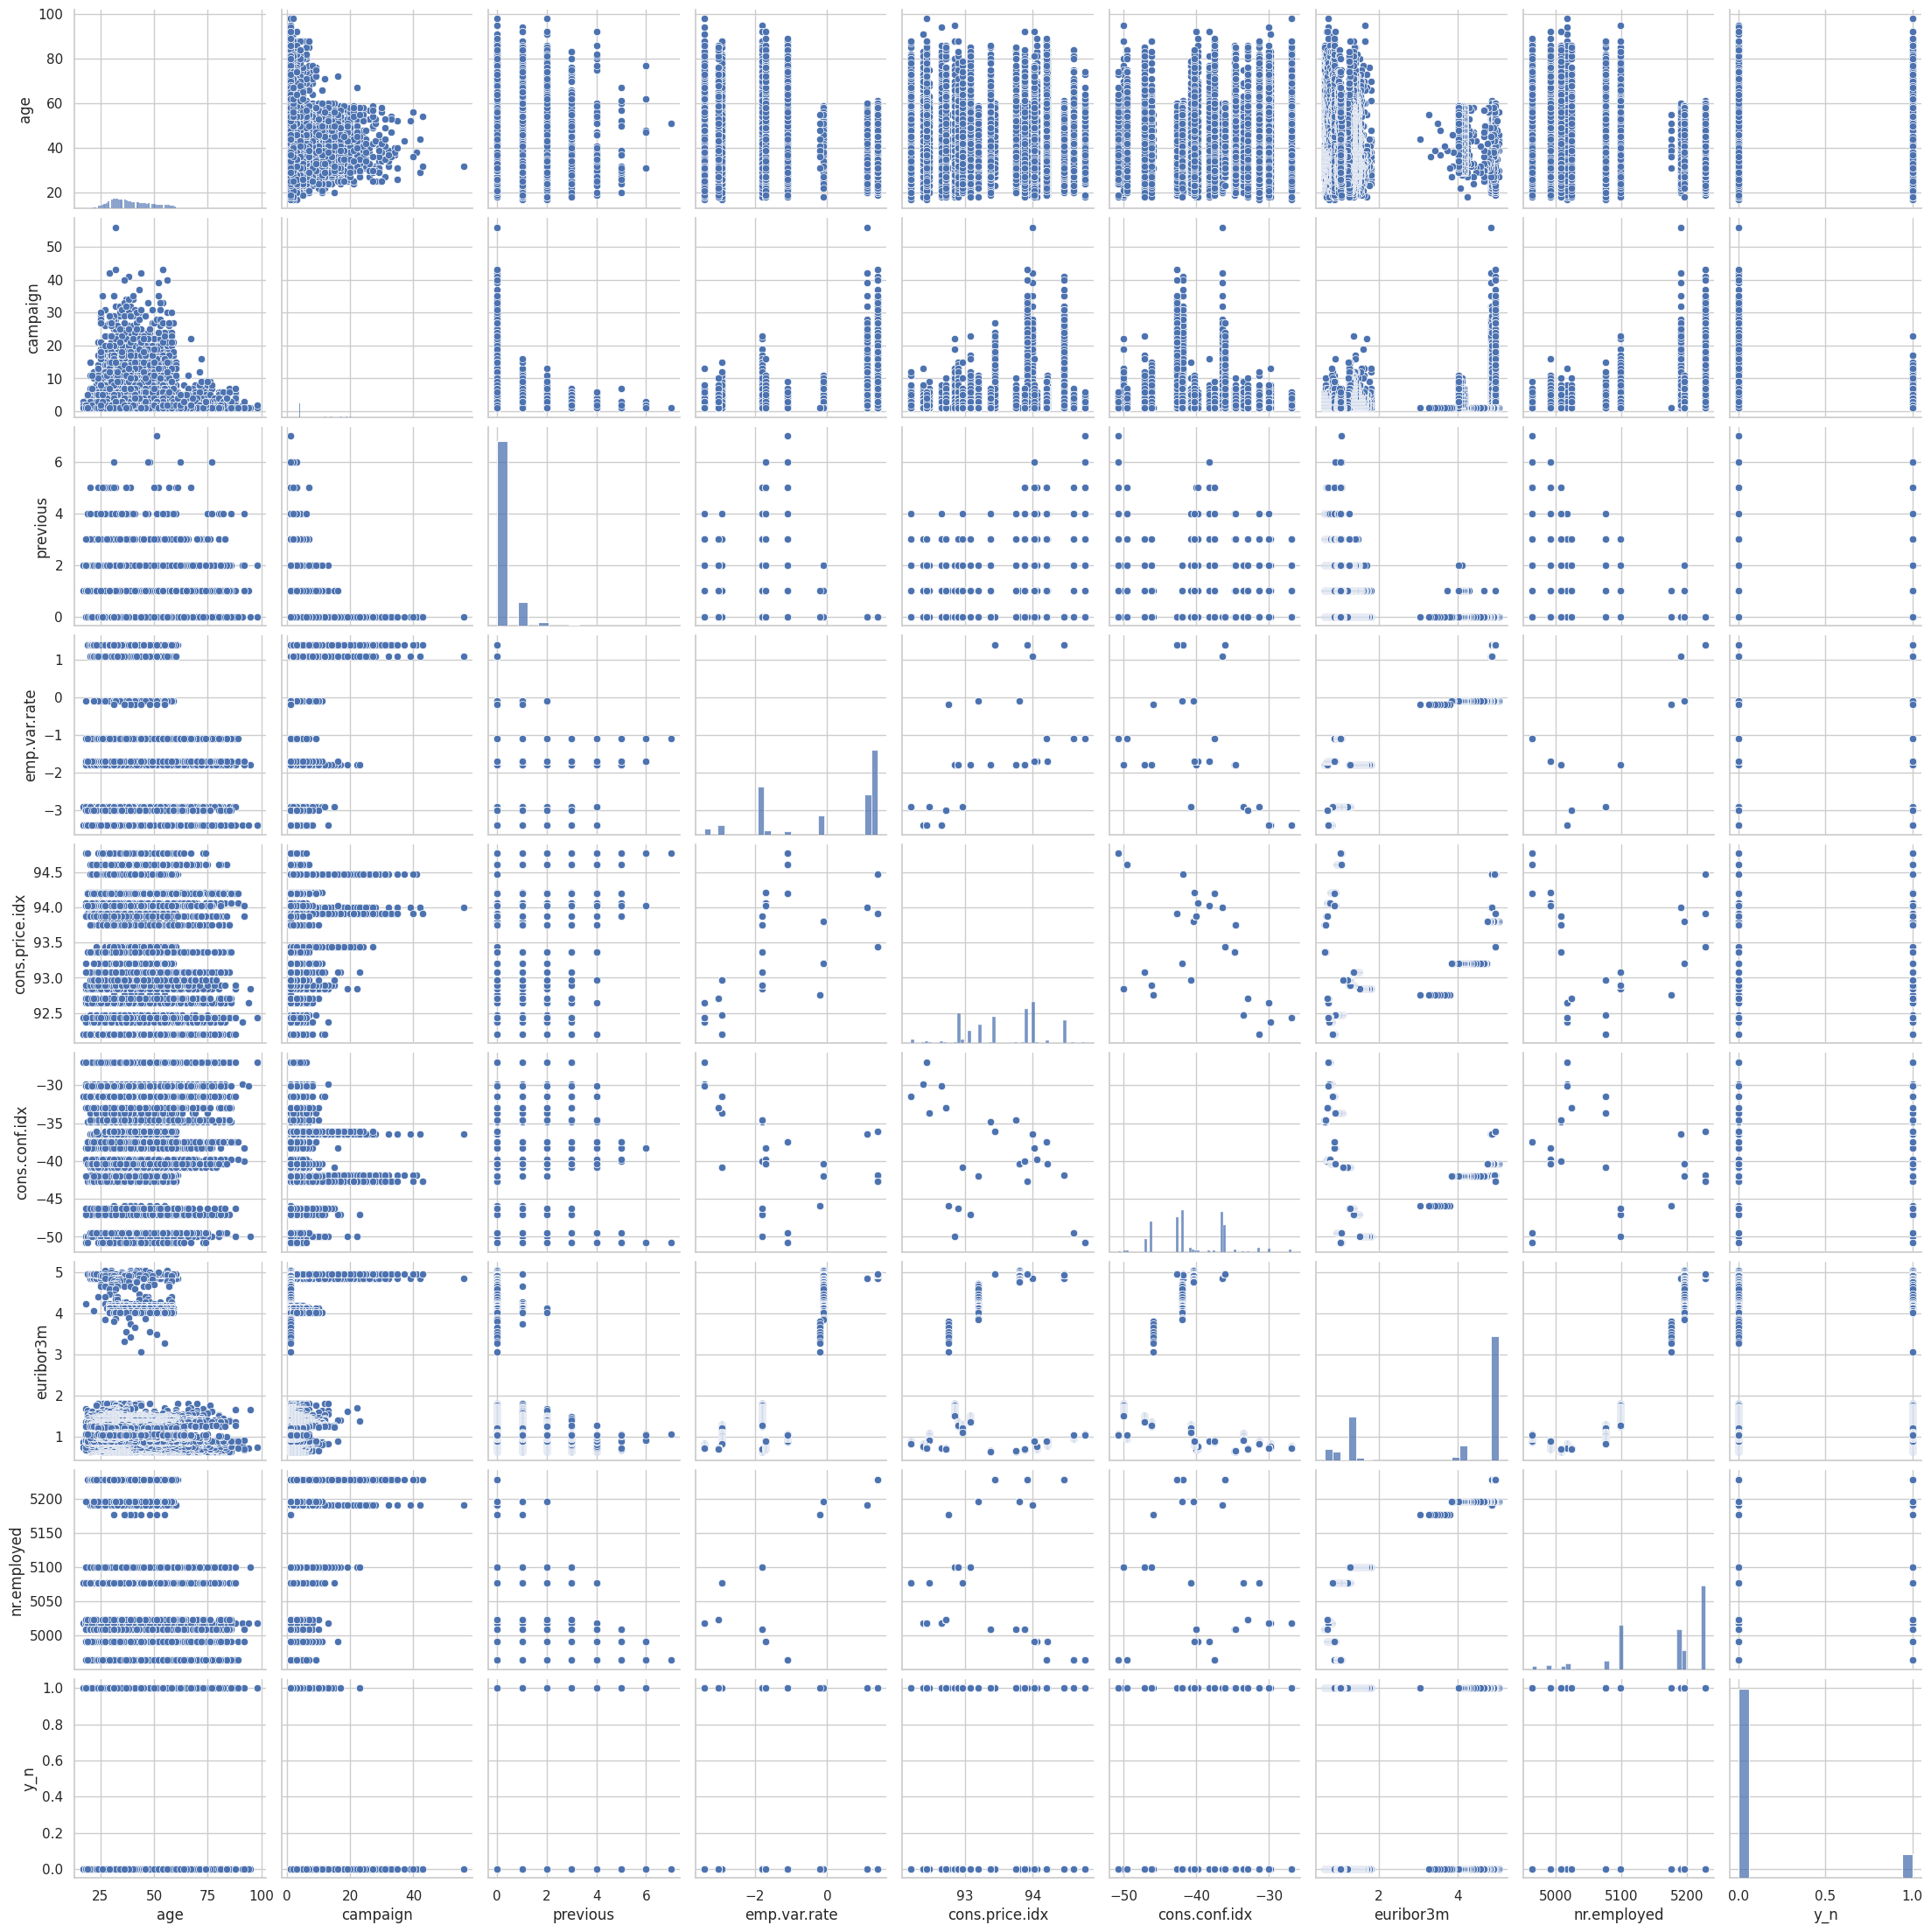

In [31]:
# relaciones todos con todos
sns.pairplot(data = df)

### Valores atípicos